In [2]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
from shapely import line_interpolate_point
import numpy as np
from shapely import Point

# Straight Road

In [205]:
G = ox.graph_from_address("BR-277", network_type="drive", dist=10000)
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_edges = gdf_edges[gdf_edges["ref"] == "BR-277"]

In [241]:
# Load the graph and filter the edges
G = ox.graph_from_address("BR-277", network_type="drive", dist=500000)
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_edges = gdf_edges[gdf_edges["ref"] == "BR-277"]
gdf_edges = gdf_edges.reset_index()
gdf_edges = gdf_edges[["ref", "length", "geometry"]]


# Function to sample points along a linestring
def sample_points_along_line(line, distance, length):
    num_points = int(length // distance)
    points = line_interpolate_point(
        line, np.linspace(0, 1, num_points), normalized=True
    ).tolist()
    return points


# Define the desired distance between points (in meters)
distance = 22

# List to hold all sampled points
sampled_points = []

# Sample points for each edge
for _, row in gdf_edges.iterrows():
    line = row.geometry
    points = sample_points_along_line(line, distance, row.length)
    sampled_points.extend(points)

# Convert the list of points into a GeoDataFrame
gdf_sampled_points = gpd.GeoDataFrame(geometry=sampled_points, crs=gdf_edges.crs)
gdf_sampled_points = gdf_sampled_points.drop_duplicates(subset=["geometry"])
gdf_sampled_points = gdf_sampled_points.reset_index(drop=True)

gdf_sampled_points

/home/gefgu/anaconda3/envs/h3-cities/lib/python3.12/site-packages/osmnx/_overpass.py:254: UserWarning: This area is 400 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


<Axes: >

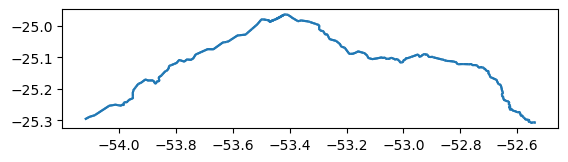

In [ ]:
gdf_edges.plot()

<Axes: >

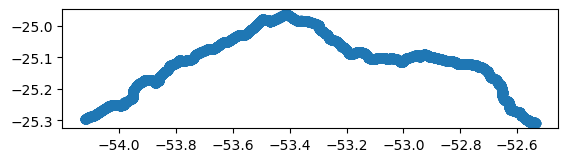

In [ ]:
gdf_sampled_points.plot()

In [ ]:
gdf_sampled_points["road_id"] = "br-277"
gdf_sampled_points["order"] = gdf_sampled_points.index
gdf_sampled_points["lat"] = gdf_sampled_points["geometry"].y
gdf_sampled_points["lon"] = gdf_sampled_points["geometry"].x
gdf_sampled_points = gdf_sampled_points.drop(columns="geometry")
gdf_sampled_points.to_csv(
    "br-277.csv",
    index=False,
)

# Another Road

In [3]:
# Load the graph and filter the edges
G = ox.graph_from_address("BR-376, Brazil", network_type="drive", dist=80000)
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_edges = gdf_edges[gdf_edges["ref"] == "BR-376"]
gdf_edges = gdf_edges.reset_index()
gdf_edges = gdf_edges[["ref", "length", "geometry"]]


# Function to sample points along a linestring
def sample_points_along_line(line, distance, length):
    num_points = int(length // distance)
    points = line_interpolate_point(
        line, np.linspace(0, 1, num_points), normalized=True
    ).tolist()
    return points


# Define the desired distance between points (in meters)
distance = 22

# List to hold all sampled points
sampled_points = []

# Sample points for each edge
for _, row in gdf_edges.iterrows():
    line = row.geometry
    points = sample_points_along_line(line, distance, row.length)
    sampled_points.extend(points)

# Convert the list of points into a GeoDataFrame
gdf_sampled_points = gpd.GeoDataFrame(geometry=sampled_points, crs=gdf_edges.crs)
gdf_sampled_points = gdf_sampled_points.drop_duplicates(subset=["geometry"])
gdf_sampled_points = gdf_sampled_points.reset_index(drop=True)

gdf_sampled_points

,geometry
0,POINT (-48.92922 -25.89682)
1,POINT (-48.92908 -25.89699)
2,POINT (-48.92895 -25.89717)
3,POINT (-48.92881 -25.89733)
4,POINT (-48.92866 -25.89750)
...,...
6962,POINT (-49.76312 -25.42408)
6963,POINT (-49.76294 -25.42423)
6964,POINT (-49.76276 -25.42438)
6965,POINT (-49.76257 -25.42452)


<Axes: >

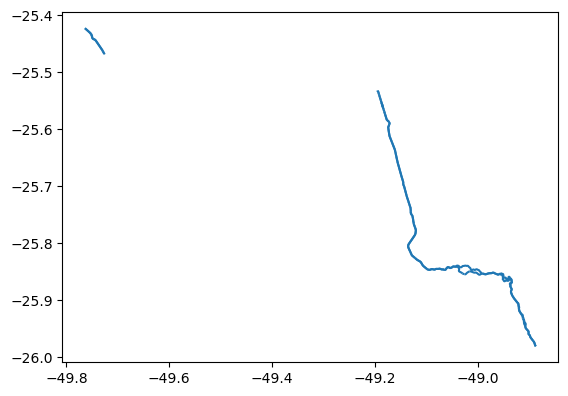

In [4]:
gdf_edges.plot()

<Axes: >

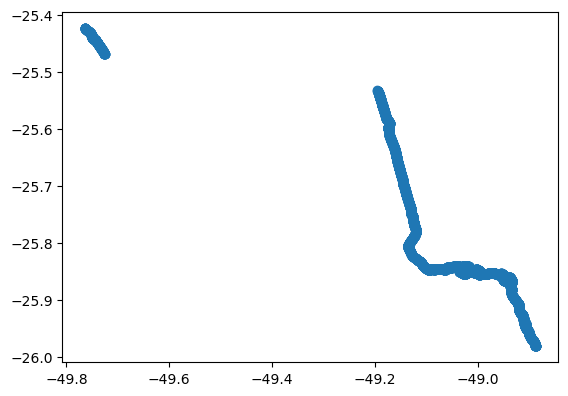

In [5]:
gdf_sampled_points.plot()

In [6]:
gdf_sampled_points["road_id"] = "br-376"
gdf_sampled_points["order"] = gdf_sampled_points.index
gdf_sampled_points["lat"] = gdf_sampled_points["geometry"].y
gdf_sampled_points["lon"] = gdf_sampled_points["geometry"].x
gdf_sampled_points = gdf_sampled_points.drop(columns="geometry")
gdf_sampled_points.to_csv(
    "br-376.csv",
    index=False,
)